**Kaggle**

# Titanic competition for practicing Stacking Ensemble technique

* Written by JEONGWOO JIN(South Korea)
* Pub Date : 2017.10.16

### Content

1. Introduction of 'Machine learning Processe and checking data'

2. EDA on train data

3. Feature engineering

4. Feature selection

5. Base modeling and evaluating among all models

6. Using Stacking ensemble technique

7. Conclusion and report

## Introduction of 'Machine learning Processe and checking data'

## 1. Introduction of 'Machine learning Processe

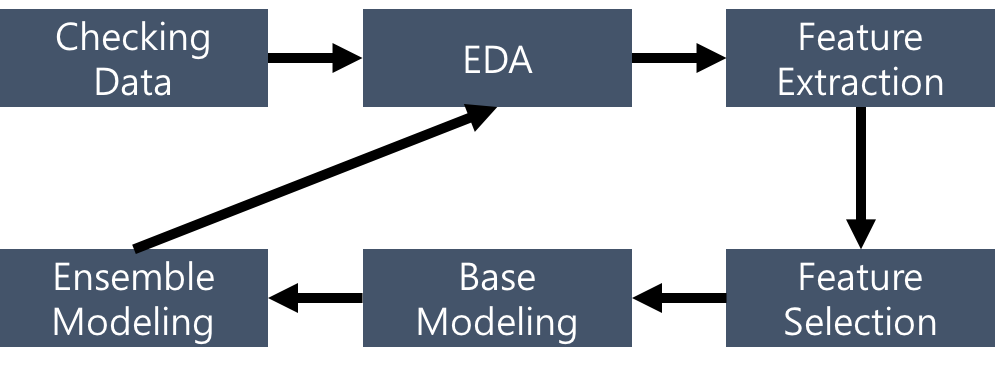

In [8]:
from IPython.display import Image
Image(filename='../img/1-1png.png', width=500, height=500) 

## 2. Checking Data

1. Check N
2. Check Head & Tail
3. Check Structures
4. Check Summary
5. Check NaN

### 데이터 로드

In [16]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

path = os.listdir('../data/')
path

['test.csv', 'train.csv']

In [18]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

### (1) Check N

In [29]:
print('============= Checking N ====================')
print('Train 데이터는 |{}| 행과 |{}| 열로 구성돼 있습니다.'.format(train.shape[0], train.shape[1]))
print('Test  데이터는 |{}| 행과 |{}| 열로 구성돼 있습니다.'.format(test.shape[0], test.shape[1]))
print('=============================================')

============= Checking N ====================
Train 데이터는 |891| 행과 |12| 열로 구성돼 있습니다.
Test  데이터는 |418| 행과 |11| 열로 구성돼 있습니다.


### (2) Check Head & Tail
동일한 과정이기 때문에 test 데이터에 대한 작업은 생략하였습니다.

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## (3) Check Structures
동일한 과정이기 때문에 test 데이터에 대한 작업은 생략하였습니다.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## (4) Check Summary
동일한 과정이기 때문에 test 데이터에 대한 작업은 생략하였습니다.

In [38]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## (5) Check NaN
동일한 과정이기 때문에 test 데이터에 대한 작업은 생략하였습니다.

In [39]:
## NaN의 수
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
## NaN의 비율 : 일반적으로 80%가 내외의 경우 drop을 고려합니다.
train.isnull().sum() / train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64